In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from datetime import date
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [ ]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
!pip install geopandas

#Title akas

In [ ]:
title_akas = pd.read_csv("https://datasets.imdbws.com/title.akas.tsv.gz", sep = "\t")
title_akas.rename(columns = {'titleId':'title_id'}, inplace = True)     #all our tcons are title_id 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [ ]:
title_akas.dtypes

title_id           object
ordering            int64
title              object
region             object
language           object
types              object
attributes         object
isOriginalTitle    object
dtype: object

In [ ]:
title_akas.isna().sum()

title_id            0
ordering            0
title               3
region             97
language            0
types               0
attributes          0
isOriginalTitle     0
dtype: int64

## Filling and replacing values

In [ ]:
# TODO: write all the fill -1 as a one line code thanks :)

In [ ]:
title_akas["title_id"] = title_akas.title_id.apply(lambda item: "-1" if item == "\\N" else item)

In [ ]:
title_akas["ordering"] = title_akas.ordering.apply(lambda item: "-1" if item == "\\N" else item)

In [ ]:
title_akas["title"] = title_akas.title.apply(lambda item: "-1" if item == "\\N" else item)

In [ ]:
title_akas["region"] = title_akas.region.apply(lambda item: "-1" if item == "\\N" else item)

In [ ]:
title_akas["language"] = title_akas.language.apply(lambda item: "-1" if item == "\\N" else item)

In [ ]:
title_akas["types"] = title_akas.types.apply(lambda item: "-1" if item == "\\N" else item)

In [ ]:
title_akas["attributes"] = title_akas.attributes.apply(lambda item: "-1" if item == "\\N" else item)

In [ ]:
title_akas["isOriginalTitle"] = title_akas.isOriginalTitle.apply(lambda item: "-1" if item == "\\N" else item)
title_akas['isOriginalTitle'].replace(0 ,'0', inplace = True)
title_akas['isOriginalTitle'].replace(1 ,'1', inplace = True)

In [ ]:
title_akas['title'].fillna('-1', inplace = True)
title_akas['region'].fillna('-1', inplace = True)

## Value counts and questions answering


### Value counts

In [ ]:
title_akas.title_id.value_counts(dropna = False)
#title_akas.title_id.unique()                     

tt0168366     175
tt0076759     110
tt8446056      98
tt8185052      98
tt7014378      93
             ... 
tt6866906       1
tt5283588       1
tt6502596       1
tt11863202      1
tt2719480       1
Name: title_id, Length: 5953137, dtype: int64

In [ ]:
title_akas.ordering.value_counts(dropna = False)                   

1      5953136
2      5168248
3      3825624
4      3596488
5      3524619
        ...   
137          1
138          1
139          1
140          1
175          1
Name: ordering, Length: 175, dtype: int64

In [ ]:
title_akas.title.value_counts(dropna = False)  
# TODO: does it match the ordering column?

Episodio #1.1                 82852
Episodio #1.2                 74724
Episodio #1.3                 70504
Episodio #1.4                 63710
Episodio #1.5                 58088
                              ...  
Luoja ties missä minä olen        1
Something more about love         1
Bui Hong                          1
前科者（1968）                         1
Los amantes criminales            1
Name: title, Length: 3866201, dtype: int64

In [ ]:
title_akas.region.value_counts(dropna = False)

FR    3522583
JP    3518813
DE    3479632
ES    3448114
IN    3442835
       ...   
NU          1
PW          1
TV          1
FM          1
NR          1
Name: region, Length: 247, dtype: int64

In [ ]:
title_akas.language.value_counts(dropna = False)   

-1     6037853
ja     3394495
fr     3361762
hi     3329695
es     3315105
        ...   
prs          1
iu           1
rn           1
haw          1
br           1
Name: language, Length: 106, dtype: int64

In [ ]:
title_akas.types.value_counts(dropna = False)  
# TODO: what's working? Is it the same as alternativeworking  or imdbDisplayworking?

-1                      24644294
imdbDisplay              3117674
original                 1855524
alternative                90666
working                    50336
dvd                        21713
video                      19973
tv                         17961
festival                   16920
dvdimdbDisplay              243
imdbDisplaytv                75
festivalimdbDisplay          66
imdbDisplayworking           31
imdbDisplayvideo             27
alternativetv                 9
tvvideo                       7
alternativeworking            6
alternativedvd                6
videoworking                  5
tvworking                     4
festivalworking               3
alternativevideo              2
alternativefestival           2
dvdvideo                      2
Name: types, dtype: int64

In [ ]:
title_akas.attributes.value_counts(dropna = False)   
# TODO: wrong value count. "video box title" is both in orthographically correct titlevideo box title and POLartvideo box title. So?

-1                                           29602421
transliterated title                            26087
alternative spelling                            17054
new title                                       16960
literal English title                           13922
                                               ...   
promotional titlethirteenth season title           1
Bable dialect title                                 1
YIVO translationreissue title                      1
thirtyseventh season title                          1
first two episodes title                            1
Name: attributes, Length: 188, dtype: int64

In [ ]:
title_akas.isOriginalTitle.value_counts(dropna = False)  

0     27977837
1      1855523
-1        2189
Name: isOriginalTitle, dtype: int64

### Which countries produced most movies?

In [ ]:
# only_films = pd.read_csv("/content/not_in_series_films.csv")

FileNotFoundError: ignored

In [ ]:
# only_films.head()

In [ ]:
# only_films.nunique()

In [ ]:
# title_akas.region.value_counts(dropna = False)
# title_akas.region.unique()

# # title_akas_country.loc[115650:115750]
# # title_akas_country.loc['tt0123338']tt0123338	== 60 Minutes

# # TODO: some values are not for regions, are actually countries. Are there regions mixed up in it? Make sure there is one fixed metric: it's either countries or regions

# title_akas_country = (title_akas[title_akas['isOriginalTitle'] != '1']).copy()
# joined_table = pd.merge(title_akas, only_films, left_on = 'title_id', right_on= 'title_id')
# joined_table.head()

NameError: ignored

In [ ]:
country_count = pd.DataFrame(data = joined_table.region.value_counts())
country_count_final = country_count.iloc[1:6]
country_count_final                              #only for movies

NameError: ignored

NameError: ignored

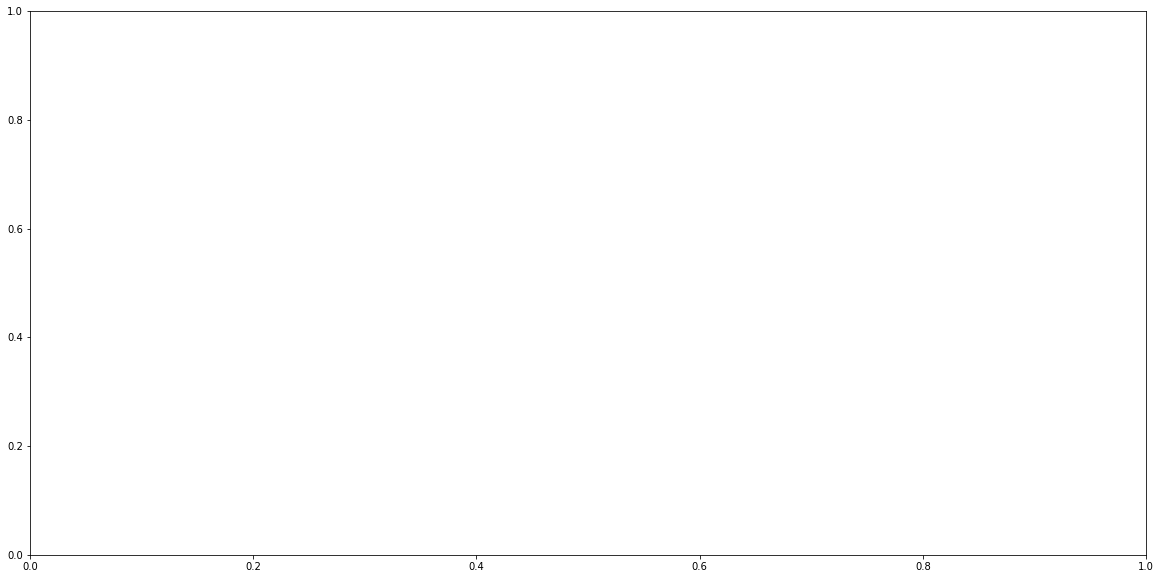

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))

ax = sns.barplot(data = country_count_final, x = country_count_final.index, y = 'region')
bar = plt.bar(country_count_final.index , country_count_final['region'])                 #Do we want blue bars or different colors?
for b in bar:
  yval = b.get_height()
  plt.text(b.get_x()+0.27, yval + 300, yval, size = 16)

ax.set_xlabel('Country', size = 15, labelpad = 14)
ax.set_ylabel('Number of movies', size = 15, labelpad = 15)
ax.set_xticklabels(['USA', 'United Kingdom', 'Spain', 'France', 'Brasil'], size = 14)
ax.set_yticklabels([0, 20000, 40000, 60000, 80000, 100000], size = 13)


plt.show()

In [ ]:
full_count = pd.DataFrame(data = title_akas_country.region.value_counts())
print(full_count.head(10))
full_count_final = full_count.iloc[0:10]
full_count_final.index =['France', 'Japan', 'Germany', 'Spain', 'India', 'Italy', 'Portugal', 'United States of America', 'Great Britain', 'Canada']
full_count_final.reset_index(inplace = True)
full_count_final.head(10)

     region
FR  3522583
JP  3518812
DE  3479632
ES  3448114
IN  3442835
IT  3429594
PT  3370819
US  1299198
GB   402899
CA   188811


,index,region
0,France,3522583
1,Japan,3518812
2,Germany,3479632
3,Spain,3448114
4,India,3442835
5,Italy,3429594
6,Portugal,3370819
7,United States of America,1299198
8,Great Britain,402899
9,Canada,188811


                      index  ...                                           geometry
0                         0  ...  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1                         0  ...  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2                         0  ...  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3                    Canada  ...  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4  United States of America  ...  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

[5 rows x 8 columns]


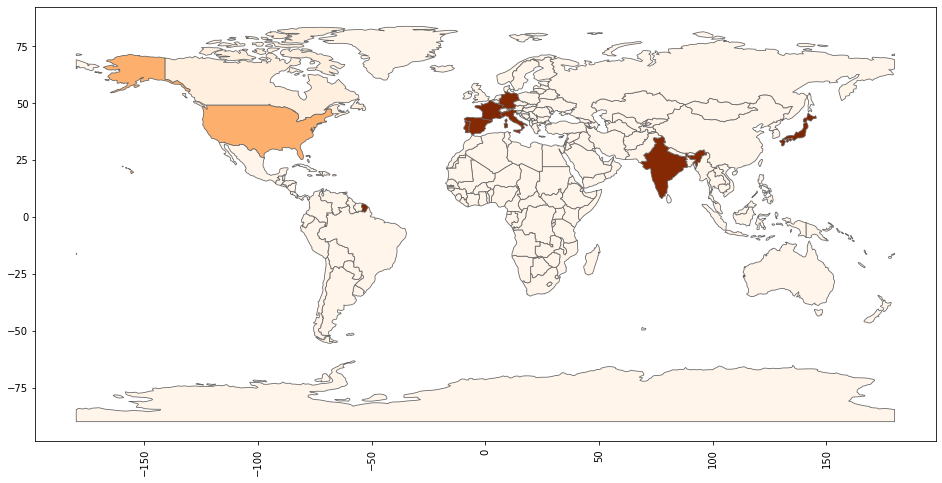

In [ ]:
# world[world['continent'] == 'Europe']
df_crazy = full_count_final.merge(world, how = 'right', left_on = 'index', right_on = 'name').fillna(0)
print(df_crazy.head())

fig, ax = plt.subplots(1, figsize=(18, 8))
plt.xticks(rotation=90)

# df_crazy.plot(column="region", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
# plt.show()
df_show = geopandas.GeoDataFrame(df_crazy)
df_show.plot(column = 'region', cmap="Oranges", linewidth=0.8, ax=ax, edgecolor=".4")
plt.show()

In [ ]:
# france = world[world['name'] == 'France']['geometry']
# world[world['geometry'] == france]


ValueError: ignored

# **Compressing**

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
# compression_opts = dict(method='zip', archive_name='titleakascheck.csv')

In [ ]:
#  title_akas.to_csv("/content/drive/MyDrive/International Football (1)/titleakascheck.zip",index = False, compression = compression_opts)